<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [381]:
options(repr.plot.width=5, repr.plot.height=5)

library("MASS") # For lda
library("caret") # For the dataset
data(GermanCredit)

# 'credit' is the reduced version that we will be working with
credit.all <- GermanCredit[,c(10, 1:9, 11:13, 16:19)]
set.seed(123)
# credit.idx <- sample(2, nrow(iris), replace=TRUE, prob=c(4/5, 1/5))
credit.idx <- sample(2, nrow(credit.all), replace=TRUE, prob=c(4/5, 1/5))

credit.train <- credit.all[credit.idx==1,]
credit.test <- credit.all[credit.idx==2,]

dim(credit.all)
dim(credit.train)
dim(credit.test)

# head(credit.train)
# head(credit.test)
str(credit.train)
str(credit.test)

[1] 1000   17

[1] 802  17

[1] 198  17

'data.frame':	802 obs. of  17 variables:
 $ Class                         : Factor w/ 2 levels "Bad","Good": 2 1 2 2 2 2 1 1 2 1 ...
 $ Duration                      : int  6 48 12 36 24 12 30 48 12 24 ...
 $ Amount                        : int  1169 5951 2096 9055 2835 3059 5234 4308 1567 1199 ...
 $ InstallmentRatePercentage     : int  4 2 2 2 3 2 4 3 1 4 ...
 $ ResidenceDuration             : int  4 2 3 4 4 4 2 4 1 4 ...
 $ Age                           : int  67 22 49 35 53 61 28 24 22 60 ...
 $ NumberExistingCredits         : int  2 1 1 1 1 1 2 1 1 2 ...
 $ NumberPeopleMaintenance       : int  1 1 2 2 1 1 1 1 1 1 ...
 $ Telephone                     : num  0 1 1 0 1 1 1 1 0 1 ...
 $ ForeignWorker                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ CheckingAccountStatus.lt.0    : num  1 0 0 0 0 0 0 1 0 1 ...
 $ CheckingAccountStatus.0.to.200: num  0 1 0 0 0 0 1 0 1 0 ...
 $ CheckingAccountStatus.gt.200  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CreditHistory.ThisBank.AllPaid: num  0 0 0 0 0 

<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

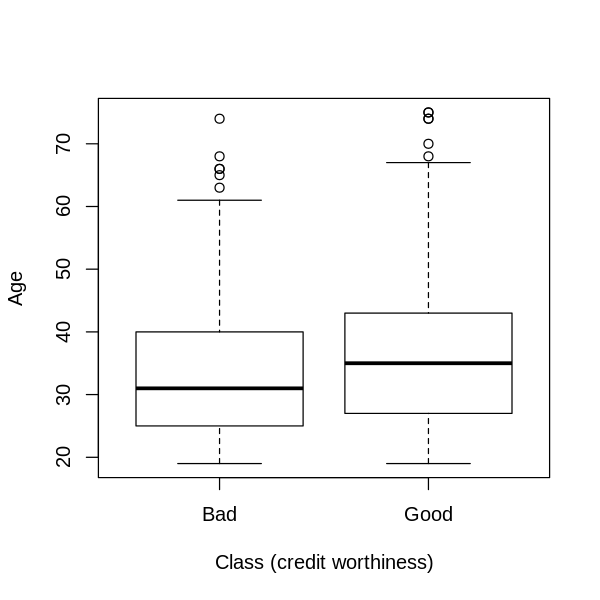

In [382]:
# Put the command (or commands) here that would give an answer to the above question.
boxplot(formula = Age ~ Class, data = credit.train, xlab = "Class (credit worthiness)", ylab = "Age")

> **ANSWER Q1**  
> Age is not a good predictor of credit worthiness, since it does not separate the "Bad" from the "Good" class well enough.

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [383]:
# Command:
xtabs(~ CreditHistory.Critical + Class, data = credit.train)

# One sentence summary:

                      Class
CreditHistory.Critical Bad Good
                     0 196  371
                     1  37  198

> **ANSWER Q2**  
> It does appear that people with critical credit history (CreditHistory.Critical==1) are more credit worthy (198 "Good" vs 37 "Bad").

<h3>Q.3. Generate a logistic regression model that uses the data. Summarize the data with a command. </h3>

In [384]:
# Command(s):
credit.glm <- glm(Class ~ ., family = "binomial", data = credit.train)

# Summarize:
summary(credit.glm)


Call:
glm(formula = Class ~ ., family = "binomial", data = credit.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4144  -0.8817   0.4509   0.7859   2.0467  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     4.007e+00  1.089e+00   3.681 0.000232 ***
Duration                       -1.898e-02  9.229e-03  -2.057 0.039714 *  
Amount                         -7.967e-05  4.210e-05  -1.892 0.058467 .  
InstallmentRatePercentage      -2.746e-01  8.966e-02  -3.063 0.002192 ** 
ResidenceDuration               2.464e-03  8.211e-02   0.030 0.976059    
Age                             1.808e-02  8.526e-03   2.120 0.034002 *  
NumberExistingCredits          -2.437e-01  1.907e-01  -1.278 0.201158    
NumberPeopleMaintenance        -1.652e-01  2.616e-01  -0.631 0.527754    
Telephone                      -2.366e-01  1.938e-01  -1.221 0.222098    
ForeignWorker                  -1.509e+00  7.663e-01  -1.

<h3>Q.4. Do values of the coefficients for CreditHistory.Critical agree with your conclusion from Q.3?</h3>

> **ANSWER Q4**  
> $\hat{E}(Class = Good | CreditHistory.Critical=1) = 1.758$  
> Yes. The estimated mean for CreditHistory.Critical is positive and it is statistically significant (p-value = 4.35e-05)

<h3>Q.5. Using the developed model, predict the values in credit.test and use it to output a confusion matrix.</h3>

In [385]:
# Command that outputs probability for each row of credit.test
credit.pred <- predict(object = credit.glm, newdata = credit.test, type = "response")

# Command(s) for confusion matrix
labels.pred <- ifelse(credit.pred > 0.5, "Good", "Bad") # use 50% threshold to divide between "Good" versus "Bad"
labels.actual <- credit.test$Class

table(labels.pred, labels.actual)

           labels.actual
labels.pred Bad Good
       Bad   28   16
       Good  39  115

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [386]:
# Command that outputs acccuracy
(28+115) / length(credit.test$Class)  # accuracy = (TP + TN) / total

[1] 0.7222222

> **ANSWER Q6**  
> The model has an accuracy of 72% on the test data set.

<h3>Q.6. Implement a function that will calculate ROC AUC.</h3>

In [387]:
auc <- function(cls, prob) 
{
    # convert test (observed) class labels into boolean vector
    cls <- ifelse(cls == "Good", TRUE, FALSE)
    
    # sort labels in descending order using their predicted probs
    cls <- cls[order(prob, decreasing=TRUE)]
    
    # calculate TPR and FPR using cumulative sums
    df <- data.frame(FPR = cumsum(!cls) / sum(!cls),
                     TPR = cumsum(cls) / sum(cls))
    
    plot(TPR~FPR, data = df)
    
    # calculate AUC
    AUC <- c()
    for(i in 1:(length(df$FPR)-1))
        {
            h<- mean(df$TPR[i:i+1])
            b<- df$FPR[i+1] - df$FPR[i]
            AUC[i] <- b*h
        }
    return(sum(AUC))
}

# testing...
# cls <- credit.test$Class
# prob <- credit.pred

# blah <- auc(cls, prob)
# blah

<h3>Q.7. What is the ROC AUC of the model on the test data?</h3>

[1] 0.7605104

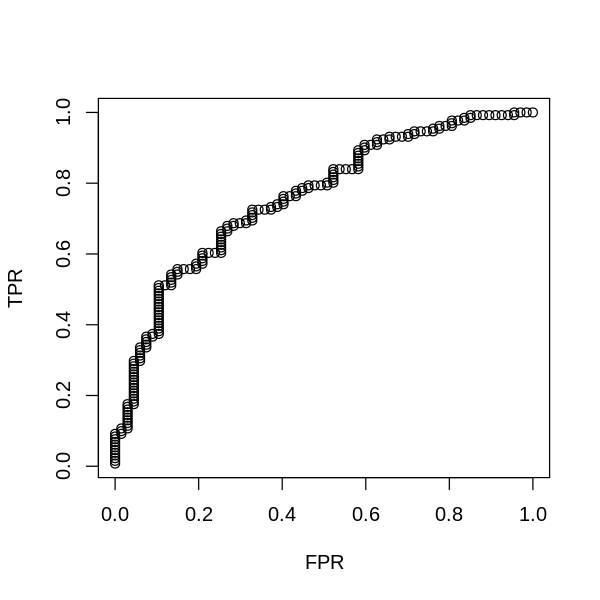

In [388]:
# Command(s):
cls <- credit.test$Class
prob <- credit.pred

auc(cls, prob)

> **ANSWER Q7**  
> ROC AUC = 0.7605

<h3>Q.8. Calculate LDA model on credit.train.</h3>

In [389]:
# Command
credit.lda <- lda(Class ~ ., data = credit.train)
str(credit.lda)

List of 10
 $ prior  : Named num [1:2] 0.291 0.709
  ..- attr(*, "names")= chr [1:2] "Bad" "Good"
 $ counts : Named int [1:2] 233 569
  ..- attr(*, "names")= chr [1:2] "Bad" "Good"
 $ means  : num [1:2, 1:16] 24.7 19.38 3888.2 3022.95 3.15 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "Bad" "Good"
  .. ..$ : chr [1:16] "Duration" "Amount" "InstallmentRatePercentage" "ResidenceDuration" ...
 $ scaling: num [1:16, 1] -1.91e-02 -7.16e-05 -2.29e-01 1.26e-02 1.48e-02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Duration" "Amount" "InstallmentRatePercentage" "ResidenceDuration" ...
  .. ..$ : chr "LD1"
 $ lev    : chr [1:2] "Bad" "Good"
 $ svd    : num 14.5
 $ N      : int 802
 $ call   : language lda(formula = Class ~ ., data = credit.train)
 $ terms  :Classes 'terms', 'formula'  language Class ~ Duration + Amount + InstallmentRatePercentage + ResidenceDuration +      Age + NumberExistingCredits + NumberPeopleMaintenance + Telephone +  ...
  .. ..- attr(*, "

<h3>Q.9. Determine a confusion matrix for the LDA model calculated on the test data. What is the accuracy of the model?</h3>

In [390]:
# Predict & confusion matrix
lda.pred <- predict(credit.lda, credit.test)

labels.pred <- ifelse(lda.pred$posterior[,2] > 0.5, "Good", "Bad")

table(labels.pred, labels.actual)

# Accuracy calculation
(28+114) / length(credit.test$Class)  # accuracy = (TP + TN) / total

           labels.actual
labels.pred Bad Good
       Bad   28   17
       Good  39  114

[1] 0.7171717

> **ANSWER Q9**  
> The model has an accuracy of 72% on the test data. For the **credit.all** data, it appears logistic regression and LDA have comparable performance.